**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [48]:
'''
Dependencies
'''
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics as met
from sklearn.model_selection import train_test_split as TTSplit
from sklearn.metrics import classification_report as ClassRep
from sklearn.metrics import confusion_matrix as ConfMat
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn import preprocessing, svm, ensemble



'''
Data Import from Files
'''
# Reading the train and test files
XTrainData = pd.read_csv("train_data.csv", header = None).values
YTrainData = pd.read_csv("train_labels.csv", header = None).values
XTestData = pd.read_csv("test_data.csv", header = None).values



'''
Data Normalization
'''
#Initialization of Scalers/Transformers/Normalizers
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
robust_scaler = preprocessing.RobustScaler()
normalize = preprocessing.Normalizer()
quantile_transformer = preprocessing.QuantileTransformer(random_state = 0)

# Normalize the data with standard
#XTrainData = standard_scaler.fit_transform(XTrainData)
#TestData = standard_scaler.fit_transform(XTestData)

# Normalize the data with minmax
#XTrainData = min_max_scaler.fit_transform(XTrainData)
#TestData = min_max_scaler.fit_transform(XTestData)

# Normalize the data with robust scaler
XTrainData = robust_scaler.fit_transform(XTrainData)
XTestData = robust_scaler.fit_transform(XTestData)

# Normalize the data with Normalize
#XTrainData = normalize.fit_transform(XTrainData)
#XTestData = normalize.fit_transform(XTestData)

# Scale data onto Uniform Distribution [0, 1]
#XTrainData = quantile_transformer.fit_transform(XTrainData)
#XTestData = quantile_transformer.fit_transform(XTestData)




'''
Data Splits (Test and Train Sets)
'''
# Splitting the Test Data into Training and Testing Sets (both Features and Labels) 
XTrainSet, XTestSet, YTrainSet, YTestSet = TTSplit(XTrainData, YTrainData, test_size = 0.7)
Test_LabelSet_Size = len(YTestSet)
Train_LabelSet_Size = len(YTrainSet)

# Reshaping and preparing the training and testing sets. (R put with variable name (R = Refined)) 
# (Just re-shaped for now. To be refined later)
YTestR = np.reshape(YTestSet, (Test_LabelSet_Size, 1))
YTrainR = np.reshape(YTrainSet, (Train_LabelSet_Size, 1))



''' 
Multinomial Logistic Regression on the data
    Iterations = 5000
    Inverse Regularization Constant = 0.1 till 10
    Solver = SAGA
    Penalty = L1
'''
C = 0.1
testAcc = []
validAcc = []
C_array = []

'''
while C < 10:
    print('Inverse of Regularization Constant (C):', C)
    logreg = LogReg(penalty = 'l1', C = C, max_iter = 5000, solver ='saga', multi_class = 'multinomial')

    # Fitting the refined training sets 
    logreg.fit(XTrainSet, YTrainR.ravel())

    # Calculation of training accuracy
    predictTest = logreg.predict(XTestSet)
    predictTrain = logreg.predict(XTrainSet)

    # Display the calculated accuracies
    print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
    print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
    testAcc.append(met.accuracy_score(predictTrain, YTrainR))
    validAcc.append(met.accuracy_score(predictTest, YTestR))
    C_array.append(C)
    
    # Display final score from Logistic Regression
    
    score = logreg.score(XTestSet, YTestSet)
    print('Final Score: ', score, '\n')
    
    # Increase constant until > 10
    C = C * 1.2
'''





''' 
Gradient Boosting Classifier on the data
    Default Settings
'''
'''
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(XTrainSet, YTrainR.ravel())
predictTest = gbc.predict(XTestSet)
predictTrain = gbc.predict(XTrainSet)
score = gbc.score(XTestSet, YTestSet)
print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
print('Final Score: ', score, '\n')
'''



''' 
Random Forest Classifier on the data
    Default Settings
'''
'''
rfc = ensemble.RandomForestClassifier()
rfc.fit(XTrainSet, YTrainR.ravel())
predictTest = rfc.predict(XTestSet)
predictTrain = rfc.predict(XTrainSet)
score = rfc.score(XTestSet, YTestSet)
print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
print('Final Score: ', score, '\n')
'''





''' 
RBF SVM Classifier on the data
    Default Settings
'''

rbfsvm = svm.SVC()
rbfsvm.fit(XTrainSet, YTrainR.ravel())
predictTest = rbfsvm.predict(XTestSet)
predictTrain = rbfsvm.predict(XTrainSet)
score = rbfsvm.score(XTestSet, YTestSet)
print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
print('Final Score: ', score, '\n')



Training Accuracy:  0.77217125382263
Testing Accuracy:  0.5754500818330606
Final Score:  0.5754500818330606 



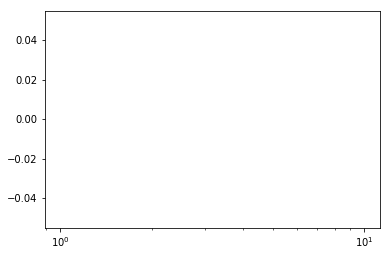

In [47]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(C_array,testAcc)
plt.plot(C_array,validAcc)
plt.xscale('log')
plt.show()

In [3]:
# Load the data and cleanup

In [4]:
#Analysis of the input data
# ...

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [5]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [6]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *